# HSV Boosting
- Fourier Transformation
- Canny Edge Detection
- SIFT

In [49]:
from skimage import io
from skimage import feature
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
import cv2

In [50]:
exp_img = "../RP1_Mamba_Unet/dataset/OpenEarthMap/OpenEarthMap_wo_xBD/aachen/images/aachen_3.tif"
img = io.imread(exp_img)

## 1. HSV Boosting
- Insights: HSV boosting for the channel 1 seems to boost the contrast of the remote sensing image, which might be a good image processing approach to increase the boundary differences between different coverage.

In [51]:
hsv_image = color.rgb2hsv(img)
hsv_image[:, :, 0] *= 2
hsv_r_boost = color.hsv2rgb(hsv_image)

hsv_image = color.rgb2hsv(img)
hsv_image[:, :, 1] *= 2
hsv_g_boost = color.hsv2rgb(hsv_image)

hsv_image = color.rgb2hsv(img)
hsv_image[:, :, 2] *= 2
hsv_b_boost = color.hsv2rgb(hsv_image)

## 2. Fourier Transformation
- Insights: High-pass filter for Fourier Transformation can retain the edge information and filter low frequency information.

In [52]:
gray_image = color.rgb2gray(img)
# Fourier Transformation
f_transform = np.fft.fft2(gray_image)
f_shift = np.fft.fftshift(f_transform)  # move the low-frequency to center
magnitude_spectrum = np.log(np.abs(f_shift) + 1)

# Low-pass filter
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2
# low-pass filter
low_pass_filter = np.zeros((rows, cols), np.uint8)
low_pass_filter[crow-30:crow+30, ccol-30:ccol+30] = 1 # center = 1 and remaining = 0
# high-pass filter
high_pass_filter = np.ones((rows, cols), np.uint8)
high_pass_filter[crow-30:crow+30, ccol-30:ccol+30] = 0

# apply low-pass filter
f_shift_filtered = f_shift * low_pass_filter
f_ishift = np.fft.ifftshift(f_shift_filtered)
img_lowpass_filtered = np.fft.ifft2(f_ishift)
img_lowpass_filtered = np.abs(img_filtered)
# apply high-pass filter
f_shift_filtered = f_shift * high_pass_filter
f_ishift = np.fft.ifftshift(f_shift_filtered)
img_highpass_filtered = np.fft.ifft2(f_ishift)
img_highpass_filtered = np.abs(img_highpass_filtered)

## 3. Canny Edge Detection
- Insights: Function similar to Fourier Transformation. Can be used for edge detection. A good feature extraction approach to let the model learn the edge and boundary information, better for segmentation.

In [53]:
edges_canny_sig_1 = feature.canny(gray_image, sigma=1.0)
edges_canny_sig_2 = feature.canny(gray_image, sigma=2.0)

## 4. SIFT
- Insights: Seems to label the key points, need experiments with the model to see the effect.

In [54]:
img_2 = cv2.imread(exp_img)
gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
# SIFT
sift = cv2.SIFT_create()
# Key points and computations
keypoints, descriptors = sift.detectAndCompute(gray, None)
# draw key points
img_with_keypoints = cv2.drawKeypoints(img_2, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

## Overall display

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.44705882352941173..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.0].


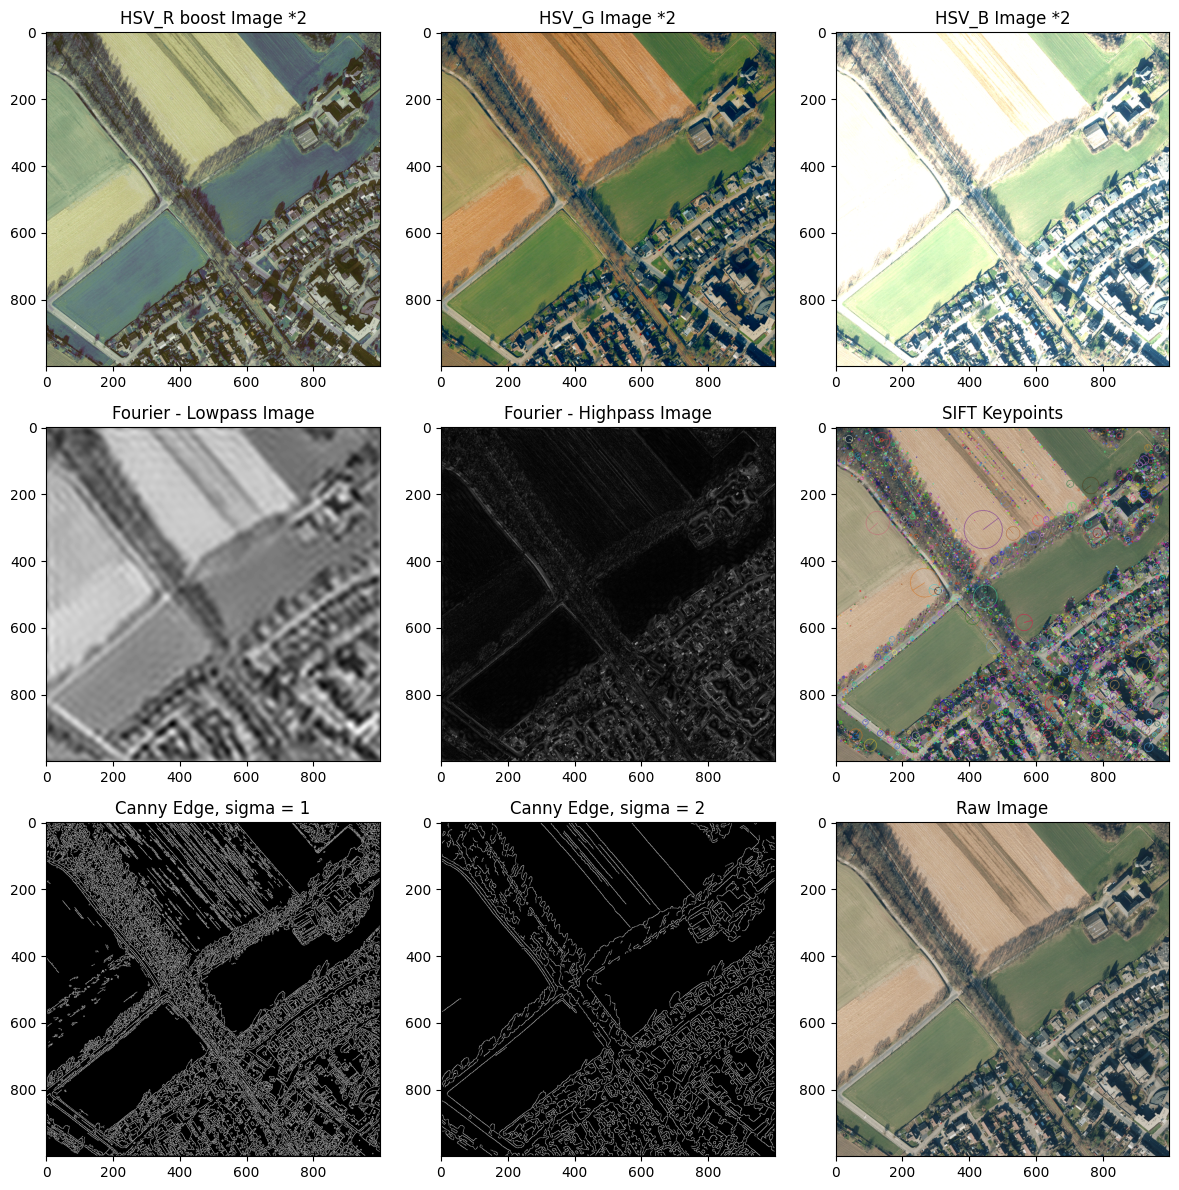

In [60]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
ax[0, 0].imshow(hsv_r_boost)
ax[0, 0].set_title('HSV_R boost Image *2')
ax[0, 1].imshow(hsv_g_boost)
ax[0, 1].set_title('HSV_G Image *2')
ax[0, 2].imshow(hsv_b_boost)
ax[0, 2].set_title('HSV_B Image *2')


ax[1, 0].imshow(img_lowpass_filtered, cmap='gray')
ax[1, 0].set_title('Fourier - Lowpass Image')
ax[1, 1].imshow(img_highpass_filtered, cmap='gray')
ax[1, 1].set_title('Fourier - Highpass Image')
ax[1, 2].imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
ax[1, 2].set_title('SIFT Keypoints')

ax[2, 0].imshow(edges_canny_sig_1, cmap='gray')
ax[2, 0].set_title('Canny Edge, sigma = 1')
ax[2, 1].imshow(edges_canny_sig_2, cmap='gray')
ax[2, 1].set_title('Canny Edge, sigma = 2')
ax[2, 2].imshow(img)
ax[2, 2].set_title('Raw Image')

plt.tight_layout()
